In [1]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import seaborn

In [2]:
from sklearn import datasets
np.random.seed(5)

centers = [[1, 1], [-1, -1], [1, -1]] #centers for the clusters
iris = datasets.load_iris() #Iris dataset
X = iris.data

In [3]:
from sklearn.cluster import KMeans
kmeans_cluster_algo = KMeans(n_clusters=3)

In [4]:
kmeans_cluster_algo.fit(X)

KMeans(n_clusters=3)

In [5]:
print(kmeans_cluster_algo.labels_[::10])

[1 1 1 1 1 0 0 0 0 0 2 2 2 2 2]


In [7]:
import collections
print ("Clusters (result of k-means)")
print (collections.Counter(kmeans_cluster_algo.labels_)) #Print the frequency of elements in a numpy array
print ("Ground truth")
print (collections.Counter(iris.target)) # ditto

Clusters (result of k-means)
Counter({0: 62, 1: 50, 2: 38})
Ground truth
Counter({0: 50, 1: 50, 2: 50})


In [8]:
#PCA example
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(X)
X_transform = pca.transform(X)

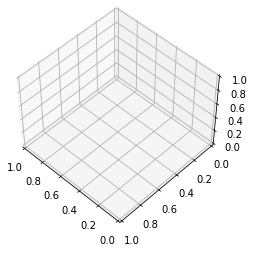

In [9]:
fig = plt.figure(1, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
X = iris.data
y = iris.target

<ipython-input-10-39c505a91fd2>:24: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = np.choose(y, [1, 2, 0]).astype(np.float)


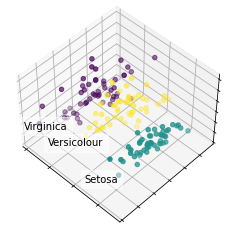

In [10]:
#PCA demonstrated and plotting example 

fig = plt.figure(1, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
X = iris.data
y = iris.target
### PCA part of the code
#============================================================
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)
#============================================================

##Plot to demonstrate PCA transformation (using a box plot to demonstrate the transoformation) - not needed for 
for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]: #Assign actual names to the numeric labels
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))

# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y) # plotting the three clusters and the indicating the sequence parameter 'c'
#ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.spectral)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()